In [3]:
!pip install -q tensorflow-gpu==2.0.0-beta1

import tensorflow as tf
print(tf.__version__)


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.15.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [7]:
#adicionando uma dimensão de cor unitária
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


(60000, 28, 28, 1)


In [8]:
#Numero de classses
K = len(set(y_train))
print("numero de classes: ",K)

numero de classes:  10


In [10]:
 #construindo o codigo usando API funcinoal
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

In [11]:
model = Model(i,x)

In [12]:
#Compilar e fit
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15)



Epoch 1/15
1875/1875 [==============================] - 38s 19ms/step - loss: 0.5227 - accuracy: 0.8067 - val_loss: 0.4107 - val_accuracy: 0.8450
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3657 - accuracy: 0.8630 - val_loss: 0.3479 - val_accuracy: 0.8711
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3157 - accuracy: 0.8804 - val_loss: 0.3331 - val_accuracy: 0.8741
Epoch 4/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2817 - accuracy: 0.8935 - val_loss: 0.3153 - val_accuracy: 0.8824
Epoch 5/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2557 - accuracy: 0.9032 - val_loss: 0.3023 - val_accuracy: 0.8935
Epoch 6/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2353 - accuracy: 0.9118 - val_loss: 0.2943 - val_accuracy: 0.8935
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2134 - accuracy: 0.9179 - val_loss: 0.2876 -

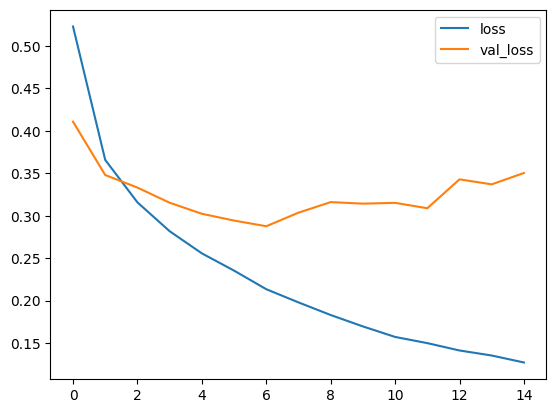

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


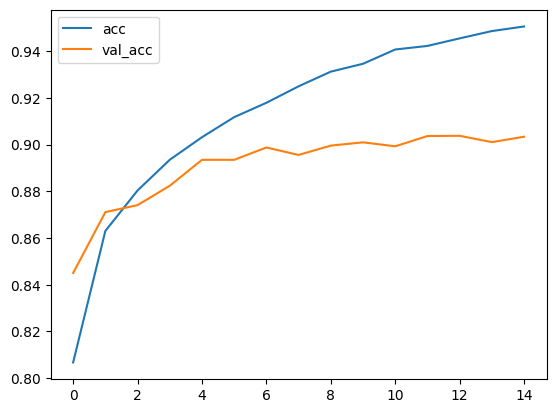

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 6ms/step
Matriz de confusão, sem normalização
[[905   0  16  18   3   1  53   0   4   0]
 [  2 976   1  11   2   0   6   0   2   0]
 [ 20   0 850  12  61   0  57   0   0   0]
 [ 17   5  18 897  34   0  26   0   3   0]
 [  2   0  51  21 834   0  89   0   3   0]
 [  1   0   0   1   1 969   0  15   1  12]
 [153   0  63  17  70   0 687   0  10   0]
 [  0   0   0   0   0   5   0 977   0  18]
 [  2   0   4   5   5   1   2   2 978   1]
 [  1   0   0   0   0   5   0  32   1 961]]


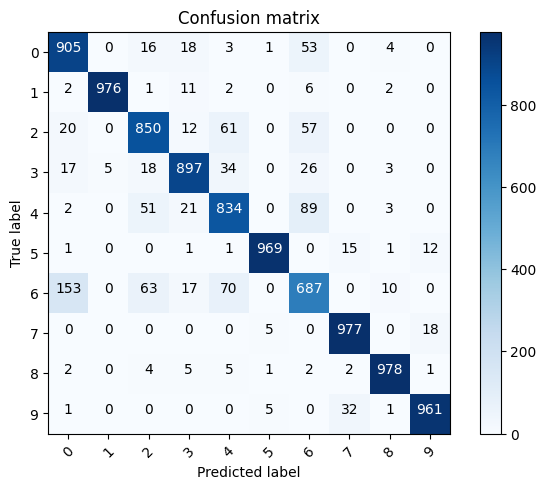

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize =False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """this funcino prints and plots the confusion matrix. normalization can be apllied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("matriz de confusão normalizada")
  else:
    print('Matriz de confusão, sem normalização')

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = "center",
             color = "white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: Dress Predicted: Trouser')

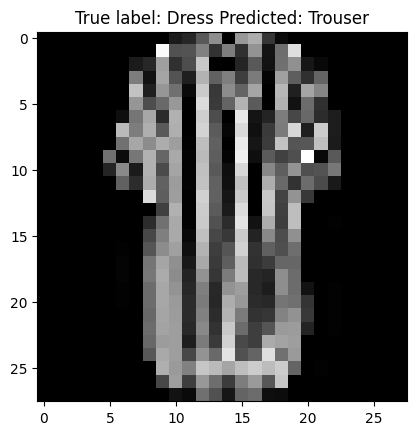

In [39]:
#label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()
#mostrar exemplos mal classificados
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))